In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/clean_data.csv")

/var/folders/j_/nltc_4q91zb8yfp_c05n9dxm0000gn/T/ipykernel_62045/812588450.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/clean_data.csv")


In [3]:
df.drop(columns=['id', 'authors', 'abstract'], inplace=True)

In [4]:
df['categories'] = df['categories'].str.split(' ')

In [5]:
df

,title,categories
0,Intelligent location of simultaneously active ...,"[cs.NE, cs.AI]"
1,Intelligent location of simultaneously active ...,"[cs.NE, cs.AI]"
2,On-line Viterbi Algorithm and Its Relationship...,[cs.DS]
3,Real Options for Project Schedules (ROPS),"[cs.CE, cond-mat.stat-mech, cs.MS, cs.NA, phys..."
4,Sparsely-spread CDMA - a statistical mechanics...,"[cs.IT, math.IT]"
...,...,...
383509,Mixed-Level Knowledge Representation and Varia...,[cs.CL]
383510,Computation in an algebra of test selection cr...,[cs.SE]
383511,Quantum Bit Commitment Expansion,[cs.CR]
383512,Additive models in high dimensions,[cs.DS]


In [6]:
df.dropna(inplace=True)

In [7]:
X = df['title']
y=df['categories']

In [8]:
# binarizing for ease
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
y_binarized = mlb.fit_transform(y)
mlb.classes_

array(['adap-org', 'astro-ph', 'astro-ph.CO', 'astro-ph.EP',
       'astro-ph.GA', 'astro-ph.HE', 'astro-ph.IM', 'astro-ph.SR',
       'cond-mat', 'cond-mat.dis-nn', 'cond-mat.mes-hall',
       'cond-mat.mtrl-sci', 'cond-mat.other', 'cond-mat.quant-gas',
       'cond-mat.soft', 'cond-mat.stat-mech', 'cond-mat.str-el',
       'cond-mat.supr-con', 'cs.AI', 'cs.AR', 'cs.CC', 'cs.CE', 'cs.CG',
       'cs.CL', 'cs.CR', 'cs.CV', 'cs.CY', 'cs.DB', 'cs.DC', 'cs.DL',
       'cs.DM', 'cs.DS', 'cs.ET', 'cs.FL', 'cs.GL', 'cs.GR', 'cs.GT',
       'cs.HC', 'cs.IR', 'cs.IT', 'cs.LG', 'cs.LO', 'cs.MA', 'cs.MM',
       'cs.MS', 'cs.NA', 'cs.NE', 'cs.NI', 'cs.OH', 'cs.OS', 'cs.PF',
       'cs.PL', 'cs.RO', 'cs.SC', 'cs.SD', 'cs.SE', 'cs.SI', 'cs.SY',
       'econ.EM', 'econ.GN', 'econ.TH', 'eess.AS', 'eess.IV', 'eess.SP',
       'eess.SY', 'gr-qc', 'hep-ex', 'hep-lat', 'hep-ph', 'hep-th',
       'math-ph', 'math.AC', 'math.AG', 'math.AP', 'math.AT', 'math.CA',
       'math.CO', 'math.CT', 'math.CV', 'ma

In [9]:
y_binarized

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [10]:
# class distribution 
class_sum = np.sum(y_binarized, axis =0)
class_distribution = pd.DataFrame(columns=['class','count'])
for i in range(len(mlb.classes_)):
    class_distribution.loc[i] = [mlb.classes_[i],class_sum[i]]
print(class_distribution)

           class  count
0       adap-org      7
1       astro-ph     23
2    astro-ph.CO     22
3    astro-ph.EP     19
4    astro-ph.GA     19
..           ...    ...
154      stat.CO    522
155      stat.ME    786
156      stat.ML  34792
157      stat.OT     98
158      stat.TH   1353

[159 rows x 2 columns]


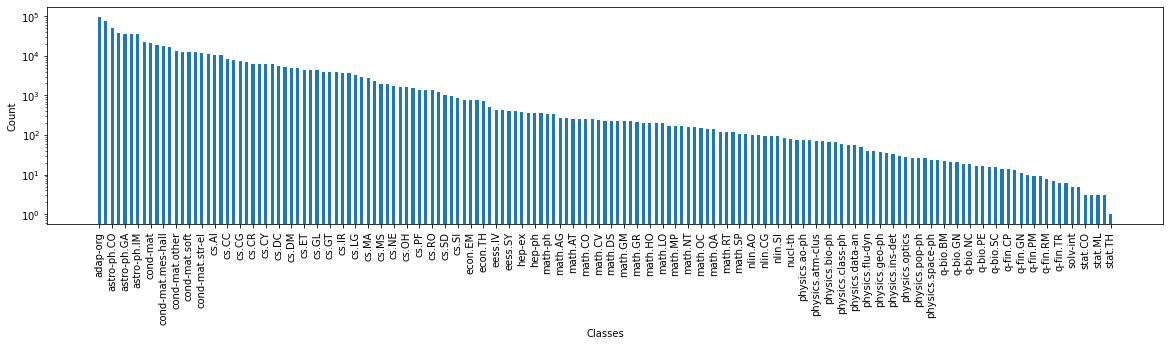

In [11]:
# plotting graph of sorted distribution 
class_distribution_sorted = class_distribution.sort_values('count', ascending=False)
plt.close("all")
fig, ax = plt.subplots(figsize = (20, 4))
idx = np.arange(len(class_distribution_sorted['count']))
width = 0.5
ax.bar(idx, class_distribution_sorted['count'], width=width)

xticks_idx = idx[::2]

ax.set_xticks(xticks_idx)
ax.set_xticklabels([class_distribution_sorted['class'][x] for x in xticks_idx], rotation=90)
ax.set_ylabel("Count")
ax.set_xlabel("Classes")
plt.yscale("log")
plt.show()
fig.savefig("classes_159.pdf", bbox_inches="tight")

In [12]:
# Removing classes < 100
class_distribution[class_distribution['count'] < 100]
print(class_distribution[class_distribution['count'] < 100].count())
remove_class_less100 = class_distribution[class_distribution['count'] < 100]['class'].to_list()
print(remove_class_less100)

class    56
count    56
dtype: int64
['adap-org', 'astro-ph', 'astro-ph.CO', 'astro-ph.EP', 'astro-ph.GA', 'astro-ph.HE', 'astro-ph.SR', 'cond-mat', 'cond-mat.mes-hall', 'cond-mat.other', 'cond-mat.quant-gas', 'cond-mat.soft', 'cond-mat.str-el', 'cond-mat.supr-con', 'gr-qc', 'hep-lat', 'hep-ph', 'hep-th', 'math.CV', 'math.GM', 'math.GN', 'math.GT', 'math.HO', 'math.OA', 'math.QA', 'math.SG', 'math.SP', 'nlin.PS', 'nlin.SI', 'nucl-ex', 'nucl-th', 'physics.acc-ph', 'physics.atm-clus', 'physics.atom-ph', 'physics.class-ph', 'physics.ed-ph', 'physics.gen-ph', 'physics.hist-ph', 'physics.ins-det', 'physics.plasm-ph', 'physics.pop-ph', 'physics.space-ph', 'q-bio', 'q-bio.CB', 'q-bio.OT', 'q-bio.SC', 'q-bio.TO', 'q-fin.CP', 'q-fin.GN', 'q-fin.MF', 'q-fin.PM', 'q-fin.PR', 'q-fin.RM', 'q-fin.TR', 'solv-int', 'stat.OT']


In [13]:
# processing dataframe
for idx, data in df.iterrows(): 
    if data['categories'] is not None:          
        for pt in data['categories']:
            if pt in remove_class_less100:
                data['categories'] = data['categories'].remove(pt)
            if data['categories'] == None:
                df.drop(idx, inplace=True)
                break
    else:
        df.drop(idx, inplace=True)


In [14]:
df

,title,categories
0,Intelligent location of simultaneously active ...,"[cs.NE, cs.AI]"
1,Intelligent location of simultaneously active ...,"[cs.NE, cs.AI]"
2,On-line Viterbi Algorithm and Its Relationship...,[cs.DS]
3,Real Options for Project Schedules (ROPS),"[cs.CE, cond-mat.stat-mech, cs.MS, cs.NA, phys..."
4,Sparsely-spread CDMA - a statistical mechanics...,"[cs.IT, math.IT]"
...,...,...
383509,Mixed-Level Knowledge Representation and Varia...,[cs.CL]
383510,Computation in an algebra of test selection cr...,[cs.SE]
383511,Quantum Bit Commitment Expansion,[cs.CR]
383512,Additive models in high dimensions,[cs.DS]


In [18]:
# saving the reduced dataset
df.to_csv('../data/103_classes_filtered.csv')

In [19]:
mlb2 = MultiLabelBinarizer()
y_binarized2 = mlb2.fit_transform(df['categories'])
len(mlb2.classes_)

103

In [20]:
class_sum = np.sum(y_binarized2, axis =0)
class_distribution2 = pd.DataFrame(columns=['class','count'])
for i in range(len(mlb2.classes_)):
    class_distribution2.loc[i] = [mlb2.classes_[i],class_sum[i]]
print(class_distribution2)

                  class  count
0           astro-ph.IM    212
1       cond-mat.dis-nn    367
2     cond-mat.mtrl-sci    179
3    cond-mat.stat-mech    422
4                 cs.AI  51083
..                  ...    ...
98              stat.AP   1636
99              stat.CO    514
100             stat.ME    786
101             stat.ML  34642
102             stat.TH   1347

[103 rows x 2 columns]


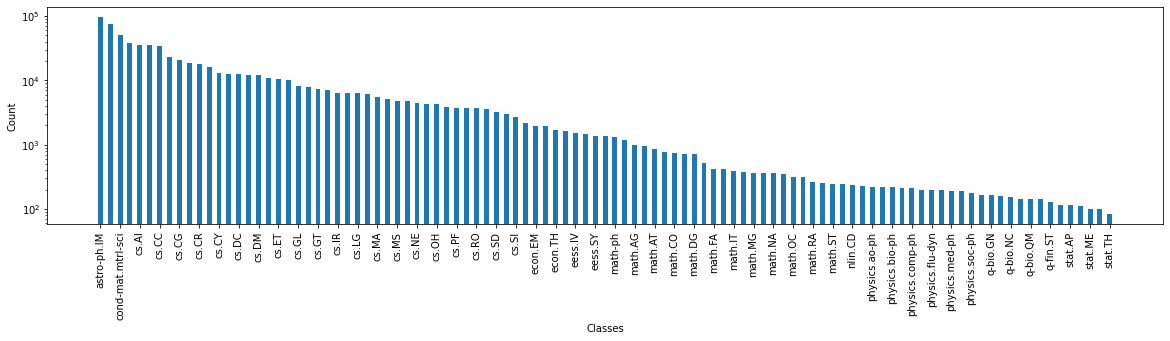

In [21]:
# plot of 103 classes
class_distribution_sorted2 = class_distribution2.sort_values('count', ascending=False)

plt.close("all")
fig, ax = plt.subplots(figsize = (20, 4))
idx = np.arange(len(class_distribution_sorted2['count']))
width = 0.5
ax.bar(idx, class_distribution_sorted2['count'], width=width)

xticks_idx = idx[::2]

ax.set_xticks(xticks_idx)
ax.set_xticklabels([class_distribution_sorted2['class'][x] for x in xticks_idx], rotation=90)
ax.set_ylabel("Count")
ax.set_xlabel("Classes")
plt.yscale("log")
plt.show()
fig.savefig("classes_103.pdf", bbox_inches="tight")